In [14]:
import numpy as np
import pandas as pd
import re
import langdetect

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df_esp = pd.read_csv('./reviews_esp.csv').loc[:,['review_content', 'review_rate']]
df_por = pd.read_csv('./reviews_por.csv').loc[:,['review_content', 'review_rate']]

In [3]:
df_esp

,review_content,review_rate
0,"Menor resolucion a la esperada, satisface de f...",2
1,Muy buena calidad!!! estoy muy conforme con e...,5
2,"Buenas sillas. Son cómodas, practicas a la hor...",4
3,En el uno normal los numeros 6 y 9 estan subra...,2
4,Excelente ayuda bastante y te evitas de estart...,5
...,...,...
124995,El producto es el indicado!!! el precio y la c...,5
124996,El producto ha salido bueno no me quejo.,1
124997,El producto me salió malo se le sale toda la p...,2
124998,Excelente juego. Hace los días más amenos.,5


In [11]:
df_esp['review_rate'].value_counts().sort_values(ascending=False)

1    25000
2    25000
3    25000
4    25000
5    25000
Name: review_rate, dtype: int64

In [60]:
chars_vocab = sorted([re.escape(c) for c in set(df_esp['review_content'].to_string()) - {''}])
print(chars_vocab)

['!', '"', '%', "'", ',', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '\\\n', '\\ ', '\\$', '\\&', '\\(', '\\)', '\\-', '\\.', '\\?', '\\\\', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '¡', '¿', 'Á', 'É', 'Ñ', 'Ó', 'Ú', 'à', 'á', 'ç', 'è', 'é', 'ë', 'ì', 'í', 'î', 'ï', 'ñ', 'ò', 'ó', 'ô', 'ù', 'ú', 'ü']


In [86]:
df_esp = pd.read_csv('./reviews_esp.csv').loc[:,['review_content', 'review_rate']]
#df_esp['review_content'] = df_esp['review_content'].str.lower()
df_esp['review_content'] = df_esp['review_content'].str.findall(pattern)
df_esp

,review_content,review_rate
0,"[Menor, resolucion, a, la, esperada, ,, satisf...",2
1,"[Muy, buena, calidad, !, !, !, estoy, muy, con...",5
2,"[Buenas, sillas, ., Son, cómodas, ,, practicas...",4
3,"[En, el, uno, normal, los, numeros, 6, y, 9, e...",2
4,"[Excelente, ayuda, bastante, y, te, evitas, de...",5
...,...,...
124995,"[El, producto, es, el, indicado, !, !, !, el, ...",5
124996,"[El, producto, ha, salido, bueno, no, me, quej...",1
124997,"[El, producto, me, salió, malo, se, le, sale, ...",2
124998,"[Excelente, juego, ., Hace, los, días, más, am...",5


In [87]:
vocab = df_esp['review_content'].explode().value_counts()
#vocab[vocab < 2]
#vocab.plot(loglog=True)
vocab[:50]

.             204461
,             111860
de             70212
que            66553
y              65883
la             60160
no             55052
el             53172
es             44869
se             36568
muy            36477
lo             36246
en             30426
producto       28965
para           27888
a              24856
un             23356
calidad        23218
pero           23034
!              22699
con            22039
me             21323
bien           20686
No             19848
Muy            18592
los            17839
las            16292
por            13411
una            13079
buena          12375
al             11440
precio         11414
El             11315
bueno          11057
Es              9847
buen            9819
como            9681
del             9357
La              8546
son             7952
si              7942
mi              7921
Excelente       7611
más             7340
poco            7143
ya              7050
tiene           6680
su           

In [104]:
!pwd

/mnt/home/lestien/Documents/BecaNLP/Programs/26-mercado-libre-api


In [124]:
import fasttext

model = fasttext.load_model('./lid.176.bin')

def r1():
    l, a = next(zip(*model.predict('Muito bom e bonito', k=1)))
    return l

r2 = lambda l: next(zip(*model.predict('Muito bom e bonito', k=1)))[0]

%timeit r1
%timeit r2

17.6 ns ± 0.317 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
20.8 ns ± 3.82 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [107]:
df_por

,review_content,review_rate
0,"Muito bom e bonito, recomendo.",5
1,"Ótimo produto, realmente cumpre o que promete.",4
2,Só não gostei da base de fixação do tampão da ...,4
3,"Meio frágil, difícil de acoplar ao flash mas é...",3
4,Ficou apertado. Mas dá pra usar por poucas h...,3
...,...,...
124995,Não gostei muito fraquinho e pequenas.,1
124996,Muito leve e versátil a única coisa que poderi...,4
124997,Muito bom. Porém é preciso ser dito o tamanho ...,5
124998,As bolsas tem uma ótima qualidade minha esposa...,5


In [ ]:
import pandas as pd
import string
import re
import fasttext


def filter_by_rates(df,max_comments,n,random_state):
    
    # Limitamos la cantidad de comentarios por producto:
    print('ordenando por importancia...')
    scores = -(df['review_rate']-1)/4 + \
    .5 * (df['review_likes']-min(df['review_likes']))/(max(df['review_likes'])-min(df['review_likes'])) + \
    .1 * (df['review_dislikes']-min(df['review_dislikes']))/(max(df['review_dislikes'])-min(df['review_dislikes']))
    indices = scores.sort_values(ascending=False).index
    df = df.loc[indices,:].groupby('prod_id').head(max_comments)
    
    # Muestreamos aleatoriamente y mezclamos:
    print('sampleando...')
    random_state = np.random.RandomState(random_state)
    df = df.iloc[np.hstack([random_state.choice(arr, n, replace=False) 
                           for arr in df.groupby('review_rate').indices.values()]),:]
    df = df.reset_index(drop=True)
    df = df.iloc[random_state.permutation(len(df)),:]
    df = df.reset_index(drop=True)
    return df


# def filter_reviews():
    
# Leo los datos:
print('leyendo los datos...')
df = pd.read_csv('data_all2.csv')

# Elimino los duplicados:
df = df.drop_duplicates(subset=['review_content']).reset_index(drop=True)

# Cambio todos los espacios por espacios simples:
df['review_content'] = df['review_content'].str.replace(r'\s+',' ',regex=True)

# Defino los caracteres con los que me voy a quedar y elimino 
# los comentarios que tienen caracteres que no van:
print('eliminando comentarios con caracteres raros...')
non_ascii = 'áàâãäÁÀÂÃÄéèêëÉÈÊẼËíìîĩïÍÌÎĨÏóòôõöÓÒÔÕÖúùûũüÚÙÛŨÜñÑçÇ'
chars_vocab = string.digits + string.ascii_letters + string.punctuation + string.whitespace + non_ascii
all_chars = df['review_content'].str.split('').explode().value_counts().index
chars_to_remove = list(set(all_chars) - set(chars_vocab) - {''})
chars_to_remove_regex = '|'.join(sorted([re.escape(c) for c in chars_to_remove]))
df = df[-df['review_content'].str.contains(chars_to_remove_regex,regex=True,na=True)].reset_index(drop=True)

# Separo por país:
print('separando por país...')
df_por = df[df['country'] == 'MLB'].reset_index(drop=True)
df_esp = df[df['country'] != 'MLB'].reset_index(drop=True)

# Elimino comentarios en otros idiomas:
model_predict = fasttext.load_model('./lid.176.bin').predict
def detect_language(s):
    l, _ = next(zip(*model_predict(s, k=1)))
    return l
print('eliminando por idioma...')
df_por = df_por[df_por['review_content'].apply(detect_language) == '__label__pt'].reset_index(drop=True)
print('eliminando por idioma...')
df_esp = df_esp[df_esp['review_content'].apply(detect_language) == '__label__es'].reset_index(drop=True)

In [236]:
# Filtramos los comentarios por valorización:
max_comments = 30
random_state = 1234
n = 25000
df = df_esp

In [196]:
df.loc[:,['review_content','review_rate']]['review_rate'].value_counts()

5    1102144
4     258598
3      86130
1      42971
2      30082
Name: review_rate, dtype: int64

In [204]:
# Limitamos la cantidad de comentarios por producto:
print('ordenando por importancia...')
scores = -1 * (df['review_rate']-1)/4 + \
.5 * (df['review_likes']-min(df['review_likes']))/(max(df['review_likes'])-min(df['review_likes'])) + \
.1 * (df['review_dislikes']-min(df['review_dislikes']))/(max(df['review_dislikes'])-min(df['review_dislikes']))
indices = scores.sort_values(ascending=False).index
df = df.loc[indices,:].groupby('prod_id').head(max_comments).reset_index(drop=True)

ordenando por importancia...


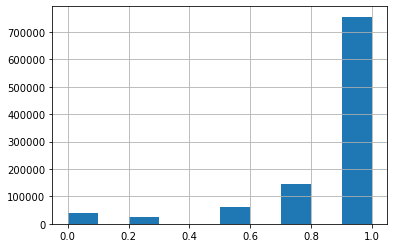

In [149]:
((df['review_rate']-1)/4).hist()

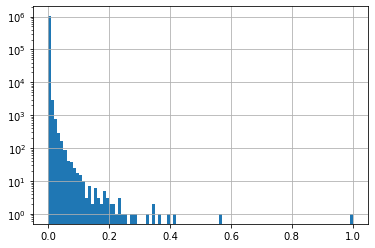

In [158]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
((df['review_dislikes']-min(df['review_dislikes']))/(max(df['review_dislikes'])-min(df['review_dislikes']))).hist(ax=ax,bins=100)
ax.set_yscale('log')

In [200]:
df1['review_rate'].value_counts()

5    687765
4    248622
3     85431
1     42921
2     29901
Name: review_rate, dtype: int64

In [198]:
df1['review_rate'].value_counts().sort_index() / df['review_rate'].value_counts().sort_index()

1    0.998836
2    0.993983
3    0.991884
4    0.961423
5    0.624025
Name: review_rate, dtype: float64

In [216]:
df.groupby(['review_rate']).indices

{1: array([     1,      4,      6, ..., 124958, 124971, 124995]),
 2: array([     3,     10,     30, ..., 124987, 124989, 124998]),
 3: array([     0,      7,     11, ..., 124992, 124997, 124999]),
 4: array([     2,      5,      9, ..., 124982, 124984, 124994]),
 5: array([     8,     17,     28, ..., 124990, 124993, 124996])}

In [257]:
dff = df.sample(n=100).copy().reset_index(drop=True).loc[:,['country','review_content','review_rate']]

In [205]:
# Muestreamos aleatoriamente y mezclamos:
print('sampleando...')
random_state = np.random.RandomState(random_state)
df = df1.iloc[np.hstack([random_state.choice(arr, n, replace=False) 
                       for arr in df.groupby('review_rate').indices.values()]),:]
df = df.reset_index(drop=True)
df = df.iloc[random_state.permutation(len(df)),:]
df = df.reset_index(drop=True)

sampleando...


In [208]:
df['country'].value_counts()

MLA    51699
MLM    41152
MLU    11164
MCO    10521
MLC     7502
MLV     2099
MPE      863
Name: country, dtype: int64

In [127]:
# df_por = filter_by_rates(df_por,max_comments,n,random_state)
# df_esp = filter_by_rates(df_esp,max_comments,n,random_state)

print('guardando resultados...')
df_esp.to_csv('data_esp.csv',index=False)
df_por.to_csv('data_por.csv',index=False)
    
filter_reviews()

leyendo los datos...
eliminando comentarios con caracteres raros...
separando por país...
eliminando por idioma...
eliminando por idioma...
ordenando por importancia...
sampleando...


ValueError: Cannot take a larger sample than population when 'replace=False'

In [87]:
df_esp = pd.read_csv('data_esp.csv').loc[:,['review_content','review_rate']]
df_por = pd.read_csv('data_por.csv').loc[:,['review_content','review_rate']]

In [90]:
df_por['review_rate'].value_counts()

5    25000
4    25000
3    25000
2    25000
1    25000
Name: review_rate, dtype: int64